# Wine Quality Prediction

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('whitegrid')

### Importing dataset

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Exploratory Data Analysis

In [8]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

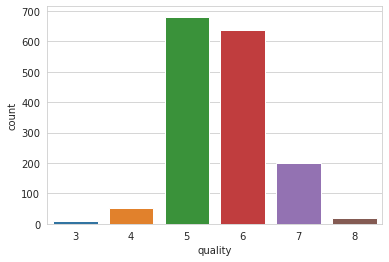

In [9]:
sns.countplot(x = 'quality', data=df)

### Visualizing the relation between different features of the dataset

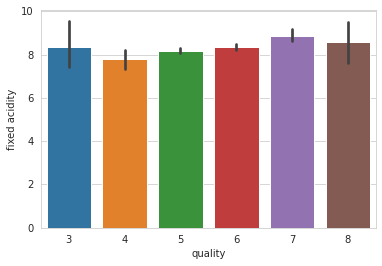

In [10]:
sns.barplot(y = 'fixed acidity', x = 'quality', data=df)
plt.show()

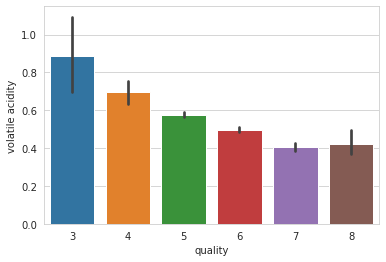

In [11]:
sns.barplot(y = 'volatile acidity', x = 'quality', data=df)
plt.show()

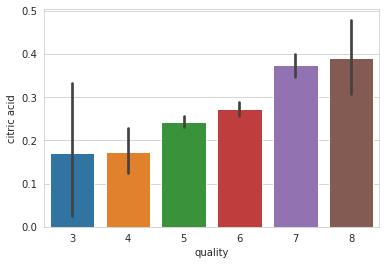

In [12]:
sns.barplot(y = 'citric acid', x = 'quality', data=df)
plt.show()

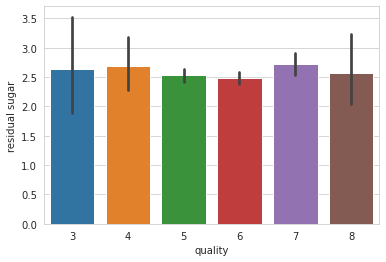

In [13]:
sns.barplot(y = 'residual sugar', x = 'quality', data=df)
plt.show()

<Figure size 1440x3600 with 0 Axes>

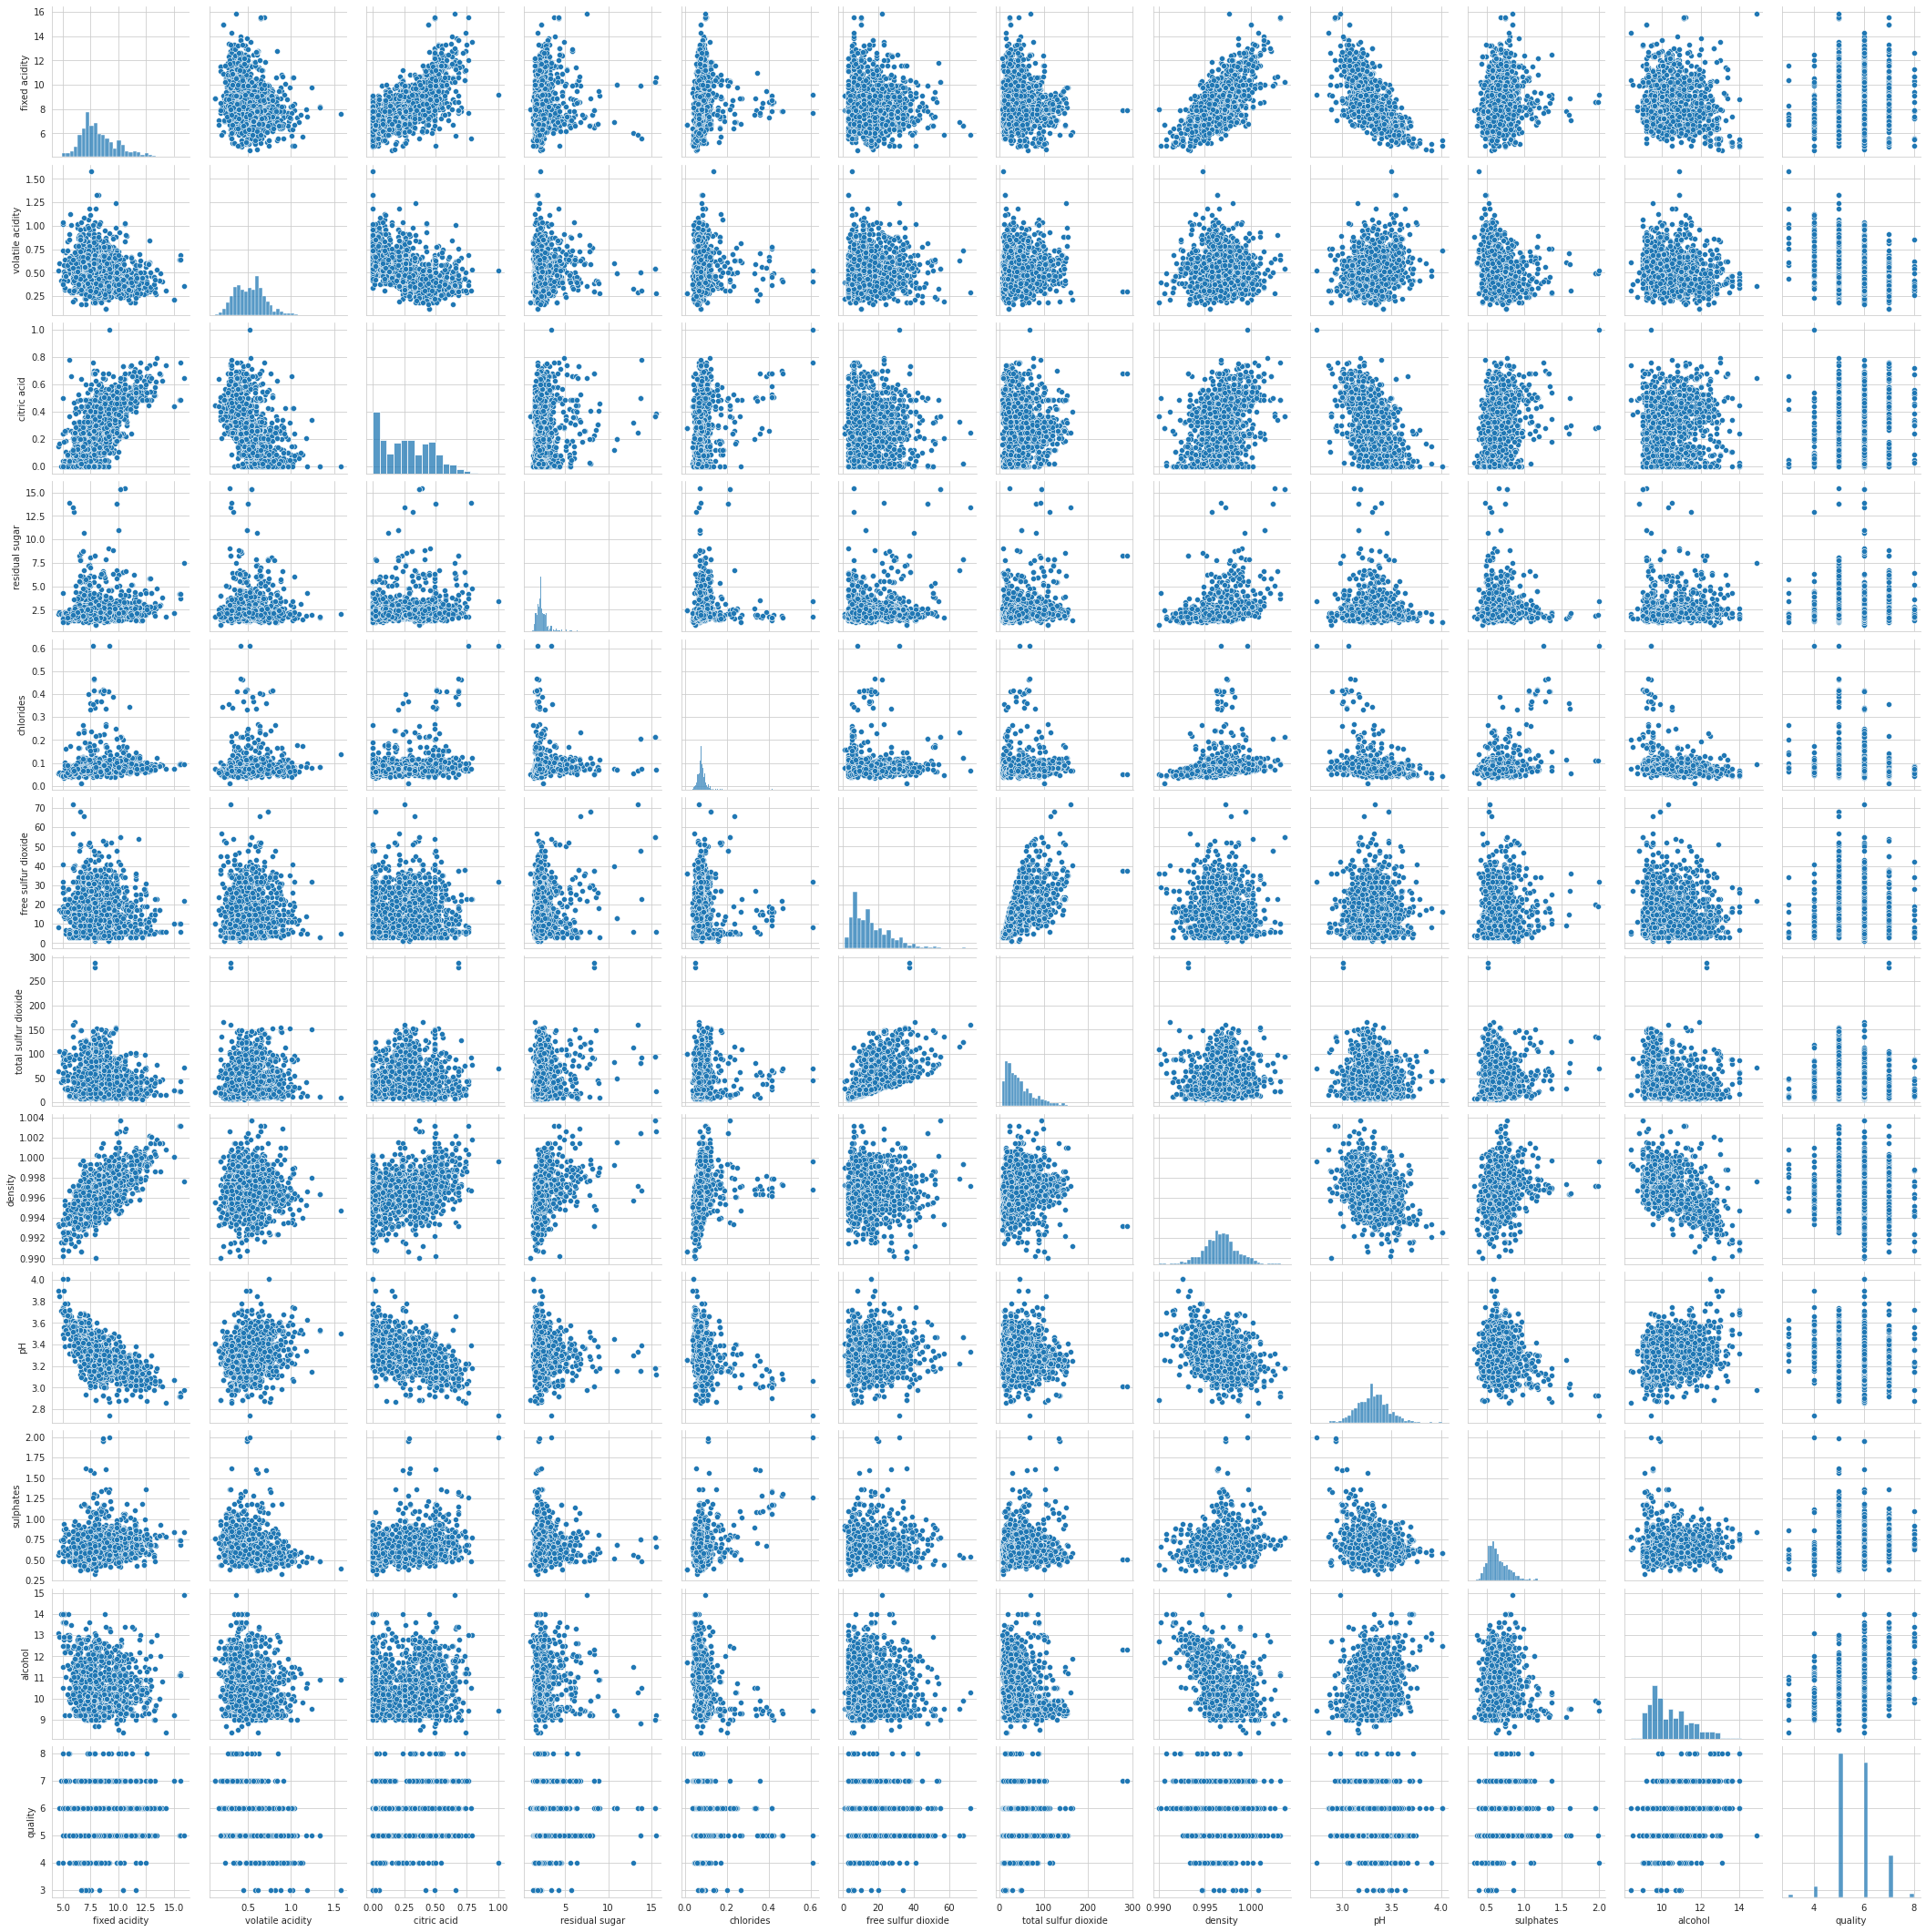

In [14]:
plt.figure(figsize=(20, 50))
sns.pairplot(df)
plt.show()

### Calculating the correlation and visualize it

In [15]:
correlation = df.corr()

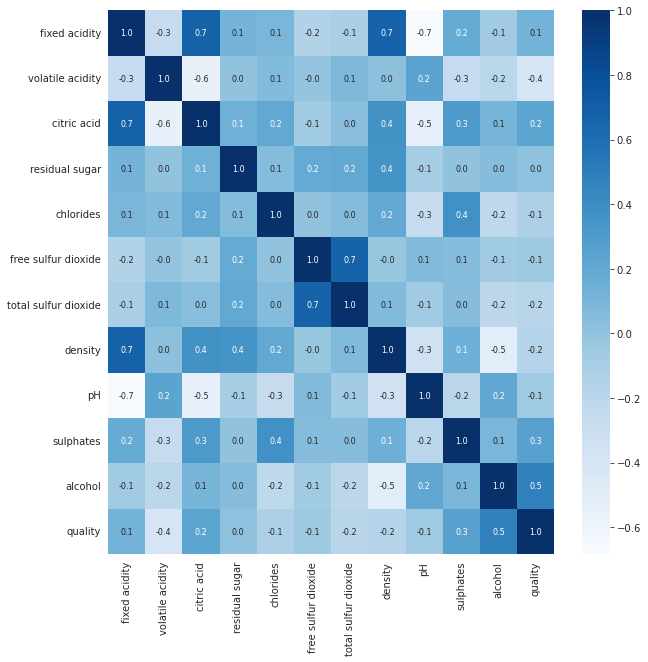

In [16]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, annot=True, annot_kws={'size': 8}, fmt='.1f', cmap='Blues')
plt.show()

### Splitting the dataset into features and target

In [17]:
X = df.drop('quality', axis=1)
y = df['quality']

### Splitting the dataset into training and test set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=2)

### Fitting the different model into train dataset

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier, XGBRFClassifier

##### Making a function fit_model for model fitting

In [20]:
def fit_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    print('The predicted values:\n ', model.predict(X_test))
    print('\nThe accuracy score: ', model.score(X_test, y_test))

### 1. Logistic Regression

In [21]:
fit_model(LogisticRegression(), X_train, X_test, y_train, y_test)

The predicted values:
  [6 6 6 5 6 6 5 6 5 6 6 6 5 7 6 6 6 6 5 6 6 5 5 6 5 6 6 6 5 5 6 5 5 5 6 6 6
 5 6 5 6 6 6 6 5 6 6 6 6 6 5 5 5 6 5 5 6 6 5 6 5 5 5 5 5 6 6 6 6 6 6 5 6 5
 5 5 5 5 5 5 6 5 6 5 6 6 6 6 5 5 5 5 5 5 5 6 5 5 6 6 5 5 5 6 5 5 5 5 5 6 5
 5 5 5 5 5 6 5 6 6 6 5 5 6 5 6 5 6 6 5 6 5 6 5 5 5 6 6 6 5 5 5 6 5 5 6 5 5
 6 6 5 6 6 6 5 5 5 6 6 5]

The accuracy score:  0.5125


### 2. Decision Tree Classifier

In [22]:
fit_model(DecisionTreeClassifier(), X_train, X_test, y_train, y_test)

The predicted values:
  [5 6 5 5 6 6 6 6 5 6 6 5 5 8 5 7 7 6 5 6 6 5 6 7 6 7 6 6 6 5 6 5 5 4 5 7 5
 5 6 5 5 6 7 6 5 6 6 5 7 7 4 5 4 7 6 5 7 7 5 6 5 5 6 6 5 5 5 6 7 6 5 4 6 6
 5 5 6 5 5 7 7 5 6 5 6 8 6 6 6 6 5 6 5 5 5 7 5 6 6 5 6 5 6 7 5 6 6 6 7 5 5
 5 5 4 5 6 5 4 7 6 6 5 5 6 4 6 6 6 6 7 5 5 5 5 5 6 6 7 6 5 5 5 5 5 5 7 5 4
 7 6 5 6 7 7 5 5 5 7 6 5]

The accuracy score:  0.6375


### 3. Random Forest Classifier

In [23]:
fit_model(RandomForestClassifier(), X_train, X_test, y_train, y_test)

The predicted values:
  [5 6 5 5 6 6 6 6 5 5 6 6 5 6 5 7 6 6 5 6 6 5 6 7 5 6 6 6 5 5 6 5 5 5 5 6 6
 5 6 5 6 6 7 6 5 6 6 6 7 6 5 5 5 6 6 5 7 7 5 6 5 6 6 6 5 5 5 6 6 6 6 5 7 5
 5 5 6 5 5 7 7 5 6 5 6 6 6 6 6 6 5 5 5 5 5 7 5 5 6 5 5 5 5 7 5 5 6 5 5 5 5
 5 5 5 5 5 6 6 7 6 6 5 5 6 5 7 6 6 6 6 5 5 5 5 5 6 6 7 6 6 5 5 5 5 5 6 5 5
 7 6 5 6 7 7 5 5 5 6 6 5]

The accuracy score:  0.66875


### 4. Support Vector Classifier

In [24]:
fit_model(SVC(kernel='linear'), X_train, X_test, y_train, y_test)

The predicted values:
  [6 6 6 5 6 6 5 6 5 6 6 6 5 6 6 6 6 6 5 6 5 5 5 6 5 6 6 6 5 5 6 5 5 5 5 6 6
 5 5 5 6 6 6 6 5 5 6 6 6 6 5 5 5 6 5 5 6 6 5 6 5 5 5 5 5 5 6 6 6 6 6 5 6 5
 5 5 5 5 5 5 6 5 6 5 6 6 6 6 5 5 5 5 5 5 5 6 5 5 6 5 5 5 5 6 5 5 5 5 5 6 5
 5 5 5 5 5 6 5 6 6 5 5 5 5 5 6 5 6 6 5 6 6 6 5 5 6 6 6 6 5 5 5 5 5 5 6 5 5
 6 6 5 6 6 6 5 5 5 6 6 5]

The accuracy score:  0.49375


### 5. XGB Classifier

In [25]:
fit_model(XGBClassifier(), X_train, X_test, y_train, y_test)

[19:41:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The predicted values:
  [5 6 5 5 6 6 6 6 6 5 6 6 5 6 4 6 7 6 5 6 6 5 6 7 5 6 6 6 5 5 6 5 6 5 5 6 6
 5 6 6 6 6 7 6 5 6 6 6 6 6 5 5 5 6 6 5 8 7 5 7 5 6 5 6 5 5 5 7 6 6 6 6 6 6
 5 5 6 5 5 7 7 5 6 5 6 6 6 6 6 6 5 6 5 5 5 7 5 5 6 5 5 5 5 5 5 5 6 6 5 5 5
 5 5 5 5 5 5 6 7 7 6 5 5 6 5 7 6 6 6 6 5 5 5 6 5 6 6 6 6 6 5 5 5 5 5 6 5 5
 7 6 5 6 7 7 5 5 5 7 6 6]

The accuracy score:  0.66875


### 6. XGBRF Classifier

In [26]:
fit_model(XGBRFClassifier(), X_train, X_test, y_train, y_test)

[19:41:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The predicted values:
  [5 6 6 5 6 6 5 6 5 6 6 5 5 6 5 7 6 6 6 6 6 5 6 7 5 6 6 6 5 5 6 4 5 5 5 6 6
 5 6 5 6 6 7 6 5 6 6 6 7 6 5 5 5 6 5 5 6 7 5 6 5 6 6 5 5 5 5 6 6 6 6 5 6 5
 5 5 5 5 5 6 7 5 6 5 5 6 6 6 6 5 5 5 5 5 5 7 6 5 6 6 5 5 5 7 5 5 6 5 5 6 5
 5 5 5 5 5 5 6 7 6 5 5 5 6 5 6 6 6 6 5 6 5 6 5 5 5 6 6 6 6 5 5 6 5 5 6 5 5
 6 6 5 6 6 7 5 5 5 6 6 5]

The accuracy score:  0.55
